Importing the libraries
- used this as a tutorial: https://www.tensorflow.org/tutorials/images/classification

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential

Creating the dataset

In [46]:
batch_size = 32
img_size = 100
data_dir = "./chess"

In [47]:
os.listdir('.')

['.DS_Store',
 '.git',
 '.gitattributes',
 '.gitignore',
 '.ipynb_checkpoints',
 'Chess',
 'cnn-Copy1.ipynb',
 'cnn.ipynb',
 'transfer_model.ipynb']

In [48]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_size, img_size),
    batch_size = batch_size)

Found 552 files belonging to 6 classes.
Using 442 files for training.


In [49]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_size, img_size),
    batch_size = batch_size)

Found 552 files belonging to 6 classes.
Using 110 files for validation.


In [50]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [51]:
class_names = train_ds.class_names
print(class_names)

['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']


Building A Neural Network Model

In [52]:
data_augmentation = Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom((-0.1,0.1)),
    layers.RandomContrast(0.05),
    layers.RandomTranslation(0.1,0.1)
])

In [53]:
num_classes = len(class_names)
reg = regularizers.l2(0.001)
img_shape = (img_size, img_size, 3)

model = Sequential([
    layers.InputLayer(input_shape=img_shape),
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, (3,3), padding='same', activation='relu', kernel_regularizer=reg, bias_regularizer=reg),
    layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=reg, bias_regularizer=reg),
    layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=reg, bias_regularizer=reg),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=reg, bias_regularizer=reg),
    layers.Dense(num_classes, activation='softmax')
])

In [54]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 100, 100, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                 

In [55]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(0.0005),
              metrics=["accuracy"])


In [56]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/30
14/14 [==============================] - 11s 477ms/step - loss: 2.0870 - accuracy: 0.2059 - val_loss: 2.0516 - val_accuracy: 0.1545
Epoch 2/30
14/14 [==============================] - 8s 435ms/step - loss: 2.0129 - accuracy: 0.2036 - val_loss: 1.9980 - val_accuracy: 0.1818
Epoch 3/30
14/14 [==============================] - 8s 454ms/step - loss: 1.9606 - accuracy: 0.2240 - val_loss: 1.9680 - val_accuracy: 0.2545
Epoch 4/30
14/14 [==============================] - 8s 434ms/step - loss: 1.9283 - accuracy: 0.2398 - val_loss: 1.9394 - val_accuracy: 0.2364
Epoch 5/30
14/14 [==============================] - 8s 449ms/step - loss: 1.9101 - accuracy: 0.2172 - val_loss: 1.9245 - val_accuracy: 0.2000
Epoch 6/30
14/14 [==============================] - 8s 426ms/step - loss: 1.8922 - accuracy: 0.2330 - val_loss: 1.9120 - val_accuracy: 0.2455
Epoch 7/30
14/14 [==============================] - 8s 468ms/step - loss: 1.8894 - accuracy: 0.2149 - val_loss: 1.8905 - val_accuracy: 0.2545
Epoch

In [57]:
accuracy = history.history['accuracy']
print(accuracy)

[0.20588235557079315, 0.20361991226673126, 0.22398190200328827, 0.2398190051317215, 0.2171945720911026, 0.23303167521953583, 0.2149321287870407, 0.2579185664653778, 0.27375566959381104, 0.26696833968162537, 0.2986425459384918, 0.28959277272224426, 0.2986425459384918, 0.31447964906692505, 0.3212669789791107, 0.3257918655872345, 0.3212669789791107, 0.3280543088912964, 0.3257918655872345, 0.33710408210754395, 0.3461538553237915, 0.3506787419319153, 0.3665158450603485, 0.3687782883644104, 0.3959276080131531, 0.3529411852359772, 0.37556561827659607, 0.3484162986278534, 0.38461539149284363, 0.4162895977497101]


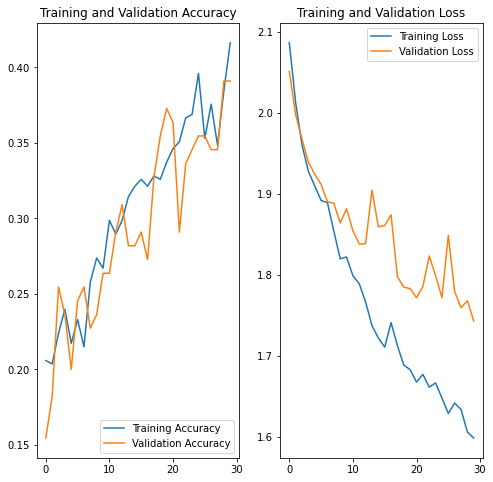

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
